In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
import pandas as pd
from scipy import io

#Load data
mnist_data = np.load(f"./data/mnist-data.npz")
mnist_training_data = mnist_data["training_data"]
mnist_training_labels = mnist_data["training_labels"]
mnist_test_data = mnist_data["test_data"]
mnist_test_data_flattened = [0] * len(mnist_test_data)

for x in range(len(mnist_test_data)):
    mnist_test_data_flattened[x] = mnist_test_data[x].flatten()

spam_data = np.load(f"./data/spam-data.npz")

spam_training_data = spam_data["training_data"]
spam_training_labels = spam_data["training_labels"]
spam_test_data = spam_data["test_data"]
spam_test_data_flattened = [0] * len(spam_test_data)

for x in range(len(spam_test_data)):
    spam_test_data_flattened[x] = spam_test_data[x].flatten()

cifar_data = np.load(f"./data/cifar10-data.npz")
cifar_training_data = cifar_data["training_data"]
cifar_training_labels = cifar_data["training_labels"]
cifar_test_data = cifar_data["test_data"]
cifar_test_data_flattened = [0] * len(cifar_test_data)

for x in range(len(cifar_test_data)):
    cifar_test_data_flattened[x] = cifar_test_data[x].flatten()


#Shuffle and Partition
shuffled_index = np.arange(len(mnist_training_data))
np.random.shuffle(shuffled_index)

mnist_shuffled_data = [0] * 60000
mnist_shuffled_labels = [0] * 60000

for x in range(60000):
    y = shuffled_index[x]
    mnist_shuffled_data[x] = mnist_training_data[y].flatten()
    mnist_shuffled_labels[x] = mnist_training_labels[y]

mnist_validation_data = mnist_shuffled_data[:10000]
mnist_validation_labels = mnist_shuffled_labels[:10000]
mnist_shuffled_data = mnist_shuffled_data[10000:] 
mnist_shuffled_labels = mnist_shuffled_labels[10000:] 

train_nums = [100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_nums = [0, 0, 0, 0, 0, 0, 0]
accuracy = [0, 0, 0, 0, 0, 0, 0]

shuffled_index = np.arange(len(spam_training_data))
np.random.shuffle(shuffled_index)

size = len(spam_training_data)
validation_size = int(size * .20)

spam_shuffled_data = [0] * size
spam_shuffled_labels = [0] * size

for x in range(size):
    y = shuffled_index[x]
    spam_shuffled_data[x] = spam_training_data[y].flatten()
    spam_shuffled_labels[x] = spam_training_labels[y]

spam_validation_data = spam_shuffled_data[:validation_size]
spam_validation_labels = spam_shuffled_labels[:validation_size]
spam_shuffled_data = spam_shuffled_data[validation_size:] 
spam_shuffled_labels = spam_shuffled_labels[validation_size:] 

train_nums1 = [100, 200, 500, 1000, 2000, size]
accuracy_nums1 = [0, 0, 0, 0, 0, 0]
accuracy1 = [0, 0, 0, 0, 0, 0]

shuffled_index = np.arange(len(cifar_training_data))
np.random.shuffle(shuffled_index)

cifar_shuffled_data = [0] * 50000
cifar_shuffled_labels = [0] * 50000

for x in range(50000):
    y = shuffled_index[x]
    cifar_shuffled_data[x] = cifar_training_data[y].flatten()
    cifar_shuffled_labels[x] = cifar_training_labels[y]

cifar_validation_data = cifar_shuffled_data[:5000]
cifar_validation_labels = cifar_shuffled_labels[:5000]
cifar_shuffled_data = cifar_shuffled_data[5000:] 
cifar_shuffled_labels = cifar_shuffled_labels[5000:] 

train_nums2 = [100, 200, 500, 1000, 2000, 5000]
accuracy_nums2 = [0, 0, 0, 0, 0, 0]
accuracy2 = [0, 0, 0, 0, 0, 0]


FileNotFoundError: [Errno 2] No such file or directory: './data/mnist-data.npz'

In [2]:
mnist_model = svm.SVC(kernel='linear')
for y in range(len(train_nums)):
    data_train = mnist_shuffled_data[:train_nums[y]]
    labels_train = mnist_shuffled_labels[:train_nums[y]]
    mnist_model.fit(data_train, labels_train)
    test_labels = mnist_model.predict(mnist_validation_data)
    test_labels1 = mnist_model.predict(data_train)
    accuracy_nums[y] = metrics.accuracy_score(mnist_validation_labels, test_labels)
    accuracy[y] = metrics.accuracy_score(labels_train, test_labels1)

NameError: name 'train_nums' is not defined

In [ ]:
spam_model = svm.SVC(kernel='linear')
for y in range(len(train_nums1)):
    data_train = spam_shuffled_data[:train_nums1[y]]
    labels_train = spam_shuffled_labels[:train_nums1[y]]
    spam_model.fit(data_train, labels_train)
    test_labels = spam_model.predict(spam_validation_data)
    test_labels1 = spam_model.predict(data_train)
    accuracy1[y] = metrics.accuracy_score(labels_train, test_labels1)
    accuracy_nums1[y] = metrics.accuracy_score(spam_validation_labels, test_labels)

In [ ]:
cifar_model = svm.SVC(kernel='linear')
for y in range(len(train_nums2)):
    data_train = cifar_shuffled_data[:train_nums2[y]]
    labels_train = cifar_shuffled_labels[:train_nums2[y]]
    cifar_model.fit(data_train, labels_train)
    test_labels = cifar_model.predict(cifar_validation_data)
    test_labels1 = cifar_model.predict(data_train)
    accuracy2[y] = metrics.accuracy_score(labels_train, test_labels1)
    accuracy_nums2[y] = metrics.accuracy_score(cifar_validation_labels, test_labels)

In [ ]:
plt.title("NMIST: Training data size vs Accuracy") 
plt.xlabel("Training data size") 
plt.ylabel("Accuracy") 
plt.plot(train_nums, accuracy_nums, label = "Validation Accuracy")
plt.plot(train_nums, accuracy, label = "Training Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.title("SPAM: Training data size vs Accuracy") 
plt.xlabel("Training data size") 
plt.ylabel("Accuracy") 
plt.plot(train_nums1, accuracy_nums1, label = "Validation Accuracy")
plt.plot(train_nums1, accuracy1, label = "Training Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.title("CIFAR: Training data size vs Accuracy") 
plt.xlabel("Training data size") 
plt.ylabel("Accuracy") 
plt.plot(train_nums2, accuracy_nums2, label = "Validation Accuracy")
plt.plot(train_nums2, accuracy2, label = "Training Accuracy")
plt.legend()
plt.show()
print(accuracy_nums2)

In [3]:
c_init = .01
rate = 1.5
c = [0] * 8
for x in range(1,9):
    c[x-1] = c_init
    c_init = c_init * (rate**(x))
print(c)

[0.01, 0.015, 0.03375, 0.11390625000000001, 0.5766503906250001, 4.378938903808595, 49.87885095119478, 852.2269299239296]


In [12]:
accuracy_nums = [0] * 8
for x in range(8):
    data_train = mnist_shuffled_data[:10000]
    labels_train = mnist_shuffled_labels[:10000]
    model = svm.SVC(C=c[x])
    model.fit(data_train, labels_train)
    test_labels = model.predict(mnist_validation_data)
    test_labels1 = model.predict(data_train)
    accuracy_nums[x] = metrics.accuracy_score(mnist_validation_labels, test_labels)

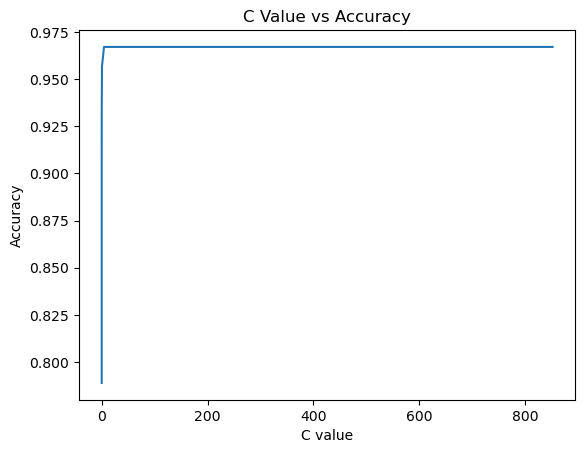

In [14]:
plt.title("C Value vs Accuracy") 
plt.xlabel("C value") 
plt.ylabel("Accuracy") 
plt.plot(c, accuracy_nums)
plt.show()

In [15]:
print(accuracy_nums)

[0.7889, 0.8656, 0.9042, 0.9342, 0.9569, 0.9671, 0.9671, 0.9671]


In [5]:
c_init = 1
rate = 1.5
c = [0] * 8
for x in range(1,9):
    c[x-1] = c_init
    c_init = c_init * (rate**(x))
print(c)

[1, 1.5, 3.375, 11.390625, 57.6650390625, 437.8938903808594, 4987.885095119476, 85222.69299239293]


In [6]:
#K-Fold Cross-Validation
shuffled_index = np.arange(len(spam_training_data))
np.random.shuffle(shuffled_index)

size = len(spam_training_data)
set_size = size//5

spam_shuffled_data = [0] * size
spam_shuffled_labels = [0] * size

for x in range(size):
    y = shuffled_index[x]
    spam_shuffled_data[x] = spam_training_data[y].flatten()
    spam_shuffled_labels[x] = spam_training_labels[y]

copy_data = spam_shuffled_data.copy()
copy_labels = spam_shuffled_labels.copy()

accuracy_list = [0] * 8

for y in range(8):
    
    accuracy = 0
    for x in range(5):

        spam_shuffled_data = copy_data.copy()
        spam_shuffled_labels = copy_labels.copy()

        validation_data = copy_data[x*set_size:(x+1)*set_size]
        validation_labels = copy_labels[x*set_size:(x+1)*set_size]

        for x in range((x+1)*set_size, x*set_size, -1):
            spam_shuffled_data.pop(x)
            spam_shuffled_labels.pop(x)

        data_train = spam_shuffled_data
        labels_train = spam_shuffled_labels

        model = svm.SVC(C = c[y])
        model.fit(data_train, labels_train)
        test_labels = model.predict(validation_data)
        accuracy += metrics.accuracy_score(validation_labels, test_labels)

    accuracy = accuracy/5
    accuracy_list[y] = accuracy 
    


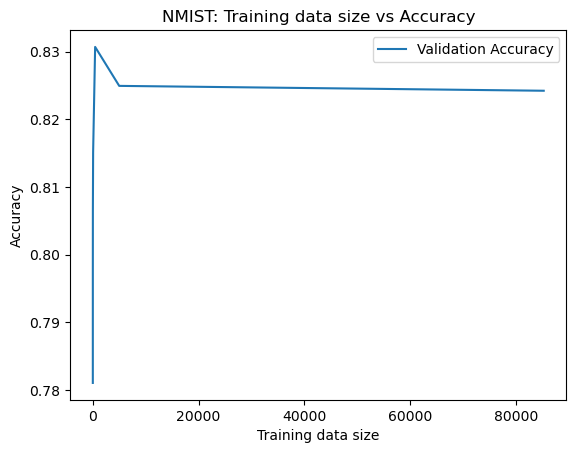

[0.7810551558752998, 0.7836930455635491, 0.7973621103117506, 0.8064748201438849, 0.8151079136690648, 0.830695443645084, 0.8249400479616307, 0.824220623501199]


In [7]:
plt.title("NMIST: Training data size vs Accuracy") 
plt.xlabel("Training data size") 
plt.ylabel("Accuracy") 
plt.plot(c, accuracy_list, label = "Validation Accuracy")
plt.legend()
plt.show()
print(accuracy_list)

In [4]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')


In [1]:
mnist_model = svm.SVC(C=49.87)
mnist_model.fit(mnist_shuffled_data, mnist_shuffled_labels)
mnist_pred = mnist_model.predict(mnist_test_data_flattened)
print(mnist_pred)
test_labels = mnist_model.predict(mnist_validation_data)
print(metrics.accuracy_score(mnist_validation_labels, test_labels))

NameError: name 'svm' is not defined

In [2]:
spam_model = svm.SVC(C=437.89)

#K-Fold Cross-Validation
shuffled_index = np.arange(len(spam_training_data))
np.random.shuffle(shuffled_index)

size = len(spam_training_data)
set_size = size//5

spam_shuffled_data = [0] * size
spam_shuffled_labels = [0] * size

for x in range(size):
    y = shuffled_index[x]
    spam_shuffled_data[x] = spam_training_data[y].flatten()
    spam_shuffled_labels[x] = spam_training_labels[y]

copy_data = spam_shuffled_data.copy()
copy_labels = spam_shuffled_labels.copy()

for x in range(5):

        spam_shuffled_data = copy_data.copy()
        spam_shuffled_labels = copy_labels.copy()

        validation_data = copy_data[x*set_size:(x+1)*set_size]
        validation_labels = copy_labels[x*set_size:(x+1)*set_size]

        for x in range((x+1)*set_size, x*set_size, -1):
            spam_shuffled_data.pop(x)
            spam_shuffled_labels.pop(x)

        data_train = spam_shuffled_data
        labels_train = spam_shuffled_labels

        spam_model.fit(data_train, labels_train)
spam_pred = spam_model.predict(spam_test_data_flattened)

In [2]:
cifar_model = svm.SVC()
cifar_model.fit(cifar_shuffled_data[:7000], cifar_shuffled_labels[:7000])
cifar_pred = cifar_model.predict(cifar_test_data_flattened)

In [18]:
results_to_csv(mnist_pred)

In [5]:
results_to_csv(spam_pred)

In [5]:
results_to_csv(cifar_pred)